In [1]:
import hexathello.aiPlayers as aiPlayers
import hexathello.autoPlayer as autoPlayer
import hexathello.engine as engine
import hexathello.history as history
import hexathello.jable as jable
import hexathello.printing as printing
import hexathello.svgRender as svgRender

from os import path
import tensorflow as tf

# -- Settings
game_size: int = 5
player_count: int = 2

2025-04-13 13:25:13.009498: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## Load a basic AI

ai_keras_id: str = 'kha_alpha_size-{}_players-{}_0'.format(
    game_size, player_count
)

ai_keras_path: str = path.join(
    'data',
    'ai',
    'examples',
    '{}.keras'.format( ai_keras_id )
)

brain_model_0: tf.keras.Model
brain_model_1: tf.keras.Model
if path.isfile( ai_keras_path ):
    brain_model_0 = tf.keras.models.load_model( ai_keras_path )
    brain_model_1 = tf.keras.models.load_model( ai_keras_path )
#
else:
    raise Exception("Missing ai_keras_path={}".format(ai_keras_path))
#

# Init the AI Agents
ai_keras_0: aiPlayers.KerasHexAgent = aiPlayers.KerasHexAgent(
    size = game_size,
    player_count = player_count,
    brain = brain_model_0,
    player_id = None,
    ai_id = ai_keras_id
)

ai_keras_1: aiPlayers.KerasHexAgent = aiPlayers.KerasHexAgent(
    size = game_size,
    player_count = player_count,
    brain = brain_model_1,
    player_id = None,
    ai_id = ai_keras_id
)

In [3]:
## Have the AI play a game
literalHistory: jable.JyFrame = autoPlayer.runHexathello_withAgents(
    agents = [ai_keras_0, ai_keras_1],
    size = game_size,
    logging_level = 0
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

<svg xmlns="http://www.w3.org/2000/svg" width="155.88457268119893" height="140.0"><polygon stroke="#000000" stroke-width="1.0" points="8.660254037844382 60.0 17.320508075688767 65.0 17.320508075688767 75.0 8.660254037844382 80.0 -3.552713678800501e-15 75.0 -3.552713678800501e-15 65.0" fill="#00AA77"/><polygon stroke="#000000" stroke-width="1.0" points="17.320508075688764 75.0 25.98076211353315 80.0 25.98076211353315 90.0 17.320508075688764 95.0 8.660254037844378 90.0 8.660254037844378 80.0" fill="#00AA77"/><polygon stroke="#000000" stroke-width="1.0" points="25.980762113533146 90.0 34.64101615137753 95.0 34.64101615137753 105.0 25.980762113533146 110.0 17.32050807568876 105.0 17.32050807568876 95.0" fill="#00AA77"/><polygon stroke="#000000" stroke-width="1.0" points="34.64101615137754 105.0 43.301270189221924 110.0 43.301270189221924 120.0 34.64101615137754 125.0 25.980762113533157 120.0 25.980762113533157 110.0" fill="#00AA77"/><polygon stroke="#000000" stroke-width="1.0" points="43.3

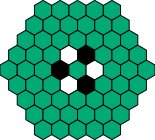

In [5]:
## Render the Game
hexagonGridHelper: engine.HexagonGridHelper = engine.HexagonGridHelper(
    player_count = player_count,
    size = game_size
)
for row in literalHistory:
    svgGame = svgRender.from_boardState_with_hexagonRadius(
        boardState = row['board_state'],
        size = game_size,
        hexagon_radius = 10.0,
        hexagon_stroke = "#000000",
        hexagon_stroke_width = 1.0,
        hexagonGridHelper = hexagonGridHelper
    )
    print( str(svgGame) )
    from IPython.display import SVG, display
    display( SVG( str(svgGame) ) )
    break
#